# Logistic Regression
Let's build a logistic regression model for the following classification problem. The input features are x1 and x2, and output is y where 0 and 1 represent two different categories.\
x1 = [1.350, 2.019, 1.659, 1.566, 1.740, 1.603, 2.194, 1.202, 1.930, 1.196, 2.021, 1.320, 1.823, 1.169, 1.226, 1.107, 2.031, 1.487, 1.921, 1.932, 1.59, 1.758]\
x2 = [0.311, 0.687, 1.247, 0.323, 0.765, 0.924, -0.401, 1.581, 1.052, 1.544, -0.157, 0.272, 1.062, 0.734, 1.771, 0.78, -0.354, 1.272, 0.011, 0.994, -0.056, 0.142]\
y = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]



First let's show the data in the feature space and use different colors/symbols to represent different categories.

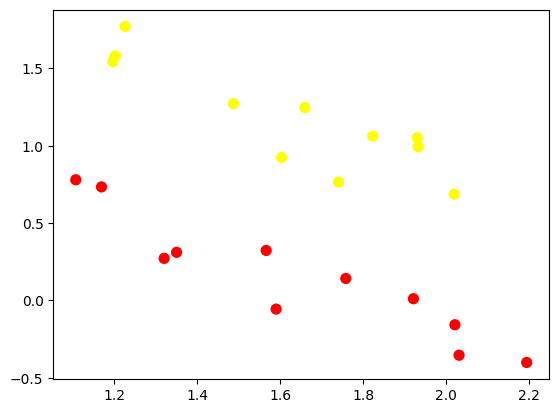

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x1 = [1.350, 2.019, 1.659, 1.566, 1.740, 1.603, 2.194, 1.202, 1.930, 1.196, 2.021, 1.320, 1.823, 1.169, 1.226, 1.107, 2.031, 1.487, 1.921, 1.932, 1.59, 1.758]
x2 = [0.311, 0.687, 1.247, 0.323, 0.765, 0.924, -0.401, 1.581, 1.052, 1.544, -0.157, 0.272, 1.062, 0.734, 1.771, 0.78, -0.354, 1.272, 0.011, 0.994, -0.056, 0.142]
Y1 = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]
X = np.column_stack((x1,x2))
y = np.array(Y1)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plt.show()

Now we'll use the package scikit-learn to find the optimal logistic regression model to classify the data, and draw the decision boundary on the previous plot

[[37.40929739 38.30243512]]
[-83.02052142]


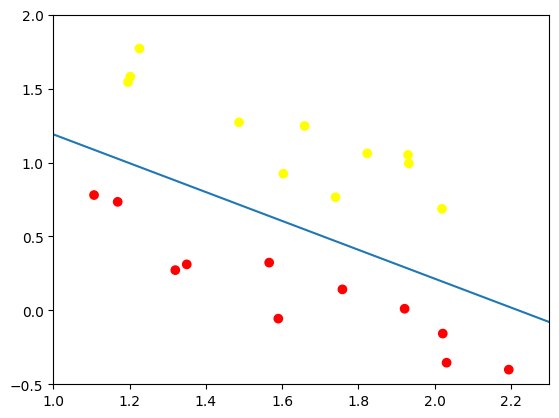

Decision Boundary:

y=2.167-0.977*x


In [7]:
# TODO: Please provide your answers here. You can add more cells for code or texts if needed. 
# Don't delete these two comments so that it would be easier for me to locate your answers.
from sklearn.linear_model import LogisticRegression

#===== get the parameters of the model=====[2 Marks]
clf = LogisticRegression(penalty=None, solver='lbfgs', max_iter=100000,random_state = 0,).fit(X, y)
print(clf.coef_)
print(clf.intercept_)

#===== scatter plot and decision boundary=====[2 Mark]
points_x=[x/10. for x in range(-50,+50)]
line_bias = clf.intercept_ #findding the intercept value to use it for finding the b in ax+b
line_w = clf.coef_.T
points_y=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in points_x]
plt.plot(points_x, points_y)
plt.xlim(1,2.3)
plt.ylim(-0.5,2)
plt.scatter(X[:,0], X[:,1],c=y,cmap='autumn')
plt.show()

#=====decision boundary equation=====
b=clf.intercept_
w1=clf.coef_.T[0]
w2=clf.coef_.T[1]
c=-b/w2
c=c.item()
m=-w1/w2
m=m.item()
print('Decision Boundary:')
print( '\ny={:.3f}{:.3f}*x'.format(c,m) )

Finally, let's use gradient descent to find the optimal logistic regression model to classify the data, and draw the decision boundary on the plot.

In [8]:
import numpy as np
import random

#===== get the parameters of the model=====[3 Marks]
x1 = [1.350, 2.019, 1.659, 1.566, 1.740, 1.603, 2.194, 1.202, 1.930, 1.196, 2.021, 1.320, 1.823, 1.169, 1.226, 1.107, 2.031, 1.487, 1.921, 1.932, 1.59, 1.758]
x2 = [0.311, 0.687, 1.247, 0.323, 0.765, 0.924, -0.401, 1.581, 1.052, 1.544, -0.157, 0.272, 1.062, 0.734, 1.771, 0.78, -0.354, 1.272, 0.011, 0.994, -0.056, 0.142]
y = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)

epsilon = 1e-9
theta_0 = -2.3
theta_1 = 0.5
theta_2 = 2.1
J = 10000
lr = 0.001
criterion = 10000
m = x1.shape[0]
iteration = 0

X = np.stack([np.ones(x1.shape), x1, x2]).T
weights = np.array([0.0,0.0,0.0])

def sigmoid(z):
    return 1 / (1 + np.exp(-z)) #function g(z)

def predict(X, weights):
    z = np.dot(X, weights) #function h(x)
    return sigmoid(z)

def cost_function(X, y, weights):
    m = y.shape[0]
    y_pred = predict(X, weights)
    cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

def gradient_descent(X, y, weights, learning_rate, iterations):
    m = y.shape[0]
    for i in range(iterations):
        y_pred = predict(X, weights)
        error = y_pred - y
        gradient = (1 / m) * np.dot(X.T, error)
        weights -= learning_rate * gradient
        if i % 10000 == 0:
            print(weights)
            print(cost_function(X, y, weights))
    return weights

weights = gradient_descent(X, y, weights, 0.02, 1000000)



[ 0.00000000e+00 -9.54545455e-05  5.13363636e-03]
0.6918316064756559
[-4.75568385  0.81955773  5.32072614]
0.1638661414628856
[-7.644943    2.21830127  6.2408577 ]
0.1073696834459585
[-9.68373119  3.21715857  6.89455484]
0.0792523771636466
[-11.24050375   3.96883424   7.43319946]
0.06278299339358837
[-12.49521819   4.56702839   7.89232797]
0.05203538473391049
[-13.54509452   5.06301407   8.29141613]
0.04448152088673781
[-14.44755762   5.48656815   8.64377849]
0.038882607545651135
[-15.23905901   5.85624201   8.95895573]
0.03456497565542998
[-15.94408772   6.18430457   9.24394968]
0.03113209656672794
[-16.57985416   6.47927064   9.50400999]
0.02833573229654427
[-17.15890087   6.74728409   9.74315343]
0.026012652929824874
[-17.69064498   6.99292097   9.96451184]
0.02405114622592619
[-18.18233463   7.21968042  10.17056922]
0.022372181485098813
[-18.63966659   7.43029781  10.36332625]
0.020918267332819738
[-19.06719919   7.62695195  10.54441663]
0.019646575014484653
[-19.46863671   7.81140

13.234925006656642 15.974930562256294
-31.380496175465183


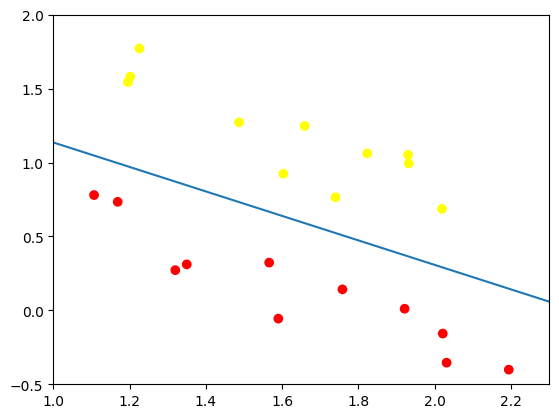

Decision Boundary:

y=1.964-0.828*x


In [9]:
x1 = [1.350, 2.019, 1.659, 1.566, 1.740, 1.603, 2.194, 1.202, 1.930, 1.196, 2.021, 1.320, 1.823, 1.169, 1.226, 1.107, 2.031, 1.487, 1.921, 1.932, 1.59, 1.758]
x2 = [0.311, 0.687, 1.247, 0.323, 0.765, 0.924, -0.401, 1.581, 1.052, 1.544, -0.157, 0.272, 1.062, 0.734, 1.771, 0.78, -0.354, 1.272, 0.011, 0.994, -0.056, 0.142]
Y1 = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]
X = np.column_stack((x1,x2))
y = np.array(Y1)

x=[x/10. for x in range(-50,+50)]
b = weights[0] #findding the intercept value to use it for finding the b in ax+b
w1= weights[1]
w2= weights[2]
print(w1,w2)
print(b)

c=-b/w2
c=np.array(c)
m=-w1/w2
m=np.array(m)
points_y=m*x+c

plt.plot(x, points_y)
plt.xlim(1,2.3)
plt.ylim(-0.5,2)
plt.scatter(X[:,0], X[:,1],c=y,cmap='autumn')
plt.show()
print('Decision Boundary:')
print( '\ny={:.3f}{:.3f}*x'.format(c,m) )